In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import xlsxwriter
import cv2
import matplotlib.colors as cs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import urllib
from pyinaturalist import get_observations
import urllib.request
from matplotlib import pyplot as plt
import matplotlib

# Color Hex Codes to Color Names
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)

from PIL import Image
from sklearn.cluster import MiniBatchKMeans

#import matplotlib.pyplot as plot
#import math

### Create a new structured dataframe using the user id

In [2]:
iNaturalist_Username = input()

In [3]:
# Create a new observation
observations = get_observations(user_id=iNaturalist_Username, page='all')

# df_list is used to append all the observations into a dataframe
df_list = []
# df_url is used to store image urls
df_url = []
# df_lat_long is used to store latitude and longitude
df_lat = []
df_long = []
# df_site_url is used to store site url
df_site_url = []
# Store user id and login
# df_user_id = []
df_user_login = []
# Store public/positional accuracy
# df_pos_acc = []
# df_pub_pos_acc = []
# Store annotations
# df_annotations = []
# Store place guess
df_place = []
#Store time_observed_at
# df_time = []

for obs in observations['results']:
    # From dict to dataframe
    df = pd.DataFrame.from_dict(obs, orient='index')
    # Get image urls
    if obs.get('photos') is not None:
        image_url = obs.get('photos')[0].get('url')
    else:
        image_url = 'None'
    # Get latitude and longitude
    # Get positional accuracy
    if obs.get('location') is not None:
        lat = obs.get('location')[0]
        lon = obs.get('location')[1]
        # pos_acc = obs.get('positional_accuracy')
        # pub_pos_acc = obs.get('public_positional_accuracy')
    else:
        lat = '             40.343137'
        lon = '             74.655070'
    # Get annotations
    # if obs.get('annotations') is not None:
    #     anno = obs.get('annotations')
    # else:
    #     anno = 'Princeton University'
    # anno = obs.get('annotations')
        # pos_acc = 'None'
        # pub_pos_acc = 'None'
    
    # Get place guess
    if obs.get('place_guess') is not None and lat != '             40.343137' and lon != '             74.655070':
        place_guess = obs.get('place_guess')
    else:
        place_guess = 'Princeton University'    
    
    # Get site url
    if obs.get('uri') is not None:
        site_url = obs.get('uri')
    else:
        site_url = 'None'
    # Get user id and login
    if obs.get('user') is not None:
        #user_id = obs.get('user').get('id')
        user_login = obs.get('user').get('login')
    else:
        #user_id = 'None'
        user_login = 'None'
    # if obs.get('time_observed_at') is not None:
    #     time_at = obs.get('time_observed_at')
    # else:
    #     time_at = 'None'
        
    # Transpose the dataframe so that rows represent images and columns are variables
    # that describe the images.
    df = df.transpose()
    df_list.append(df)
    df_url.append(image_url)
    df_lat.append(lat)
    df_long.append(lon)
    df_site_url.append(site_url)
    #df_user_id.append(user_id)
    df_user_login.append(user_login)
    # df_pos_acc.append(pos_acc)
    # df_pub_pos_acc.append(pub_pos_acc)
    # df_annotations.append(anno)
    df_place.append(place_guess)
    # df_time.append(time_at)

# Concatenate all dataframes
iNatStruct = pd.concat(df_list)

# Add updated columns to the dataframe
iNatStruct['square_image_url'] = df_url
iNatStruct['latitude'] = df_lat
iNatStruct['longitude'] = df_long
iNatStruct['site_url'] = df_site_url
#iNatStruct['user_id'] = df_user_id
iNatStruct['User'] = df_user_login
# iNatStruct['positional_accuracy'] = df_pos_acc
# iNatStruct['public_positional_accuracy'] = df_pub_pos_acc
# iNatStruct['annotations'] = df_annotations
iNatStruct['place_guess'] = df_place
# iNatStruct['time_observed_at'] = df_time

# Replace image size from 'square' to 'medium' and 'large'
iNatStruct['Image_Link'] = iNatStruct['square_image_url'].replace('square', 'medium', regex=True)
# iNatStruct['large_image_url'] = iNatStruct['square_image_url'].replace('square', 'large', regex=True)

# Reset index and drop the old index
iNatStruct = iNatStruct.reset_index()
# iNatStruct = iNatStruct.drop(['index'], axis=1)

iNatStruct.head(3)
# observations['results']

,index,quality_grade,time_observed_at,taxon_geoprivacy,annotations,uuid,id,cached_votes_total,identifications_most_agree,species_guess,...,observation_photos,faves,non_owner_ids,observed_on,square_image_url,latitude,longitude,site_url,User,Image_Link
0,0,needs_id,2022-05-25T12:07:21-04:00,open,[],7db04325-38f7-4029-9dc9-766616b94437,118661315,0,False,None,...,"[{'id': 190373088, 'position': 0, 'uuid': 'd0d...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-05-25 12:07:21-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.246322,-80.409523,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
1,0,research,2022-05-25T12:09:03-04:00,obscured,[],7fe69598-d795-4241-9cec-c2e5c5a61151,118661513,0,True,Carolina sweetshrub,...,"[{'id': 190372817, 'position': 0, 'uuid': 'c70...",[],"[{'hidden': False, 'disagreement': None, 'flag...",2022-05-25 12:09:03-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.350497,-80.484791,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...
2,0,needs_id,2022-05-25T12:10:21-04:00,None,[],440685b3-675a-4eb7-8817-4f5964eb53f0,118661745,0,False,None,...,"[{'id': 190372696, 'position': 0, 'uuid': '6ba...",[],[],2022-05-25 12:10:21-05:00,https://inaturalist-open-data.s3.amazonaws.com...,37.246163,-80.409251,https://www.inaturalist.org/observations/11866...,llhouse2,https://inaturalist-open-data.s3.amazonaws.com...


## Continue on initial structured data frame 

In [4]:
# Split time_observed_at into date and time
def convertT(time):
    time = time.replace('T',' ')
    return time

iNatStruct.time_observed_at.map(lambda t: convertT(t).split())[0][1]

'12:07:21-04:00'

In [5]:
# Use lambda function to split time_observed_at into date and time
for i in iNatStruct.time_observed_at:    
    iNatStruct['observed_date'] = (iNatStruct.time_observed_at.map(lambda t: convertT(t).split()[0]))
    iNatStruct['observed_time'] = (iNatStruct.time_observed_at.map(lambda t: convertT(t).split()[1]))

In [6]:
# shift columns observed_date and observed_time to position 1 and 2
column1 = iNatStruct.pop('observed_date')
column2 = iNatStruct.pop('observed_time')
  
# insert column using insert
iNatStruct.insert(1, 'observed_date', column1)
iNatStruct.insert(2, 'observed_time', column2)

# delete time_observed_at column
del iNatStruct["time_observed_at"]
del iNatStruct["observed_on"]
#del iNatStruct["observed_time"]

In [7]:
# shift location column to last column
column1 = iNatStruct.pop('location')
  
# insert location column using insert
iNatStruct.insert(len(iNatStruct) - 1, 'location', column1) 
# not sure why it's not moving the column to last position

In [8]:
# Remove the characters after '-'
def removeChar(char):
    ch = "-"
    char = char.split(ch, 1)[0]
    return char

# Use lambda function to remove the characters after '-'
iNatStruct['observed_time'] = iNatStruct.observed_time.map(lambda t: removeChar(t))

In [9]:
# Remove the characters after '+'
def removeChara(char):
    ch = "+"
    char = char.split(ch, 1)[0]
    return char

# Use lambda function to remove the characters after '+'
iNatStruct['observed_time'] = iNatStruct.observed_time.map(lambda t: removeChara(t))

In [10]:
# Time to Second
def timeToSec(time):
    time = time.split(':')
    sec = int(time[0])*3600 + int(time[1])*60 + int(time[2])
    return sec

# Use lambda function to convert time to second
iNatStruct['Seconds'] = iNatStruct.observed_time.map(lambda t: timeToSec(t))

In [11]:
# Rename columns
iNatStruct.rename(columns = {'species_guess':'Species', 'observed_date':'Date', 'observed_time':'Time', 
                             'place_guess':'Place', 'latitude':'Lat', 'longitude':'Long'}, inplace = True)

# The structured dataframe is now ready
iNatStruct = iNatStruct[["Image_Link", "Species", "User", "Date", "Time", "Seconds", "Place", "Lat", "Long"]]

# Sort DataFrame by date and time
iNatStruct = iNatStruct.sort_values(['Date', 'Time'], ascending = [True, True])

# Add p_ column
p_lab = ['p'+str(s+1) for s in iNatStruct.index]
iNatStruct.insert(0, "Image_Label", p_lab)

# Sort DataFrame by Image_Label
iNatStruct = iNatStruct.sort_values('Image_Label', key=lambda x: x.str.extract('(\d+)').squeeze().astype(int))

iNatStruct

,Image_Label,Image_Link,Species,User,Date,Time,Seconds,Place,Lat,Long
0,p1,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:07:21,43641,"Highview Dr, Blacksburg, VA, US",37.246322,-80.409523
1,p2,https://inaturalist-open-data.s3.amazonaws.com...,Carolina sweetshrub,llhouse2,2022-05-25,12:09:03,43743,"Virginia, US",37.350497,-80.484791
2,p3,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:10:21,43821,"Highview Dr, Blacksburg, VA, US",37.246163,-80.409251
3,p4,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:10:37,43837,"Highview Dr, Blacksburg, VA, US",37.246379,-80.409562
4,p5,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-06-03,10:48:19,38899,Princeton University,40.343137,74.655070
5,p6,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-06-03,10:41:30,38490,Princeton University,40.343137,74.655070
6,p7,https://inaturalist-open-data.s3.amazonaws.com...,Moosewood,llhouse2,2022-06-09,10:10:02,36602,"Jefferson National Forest, Virginia 24134, USA",37.250402,-80.666454
7,p8,https://inaturalist-open-data.s3.amazonaws.com...,American Chestnut,llhouse2,2022-06-09,10:10:00,36600,"Giles County, VA, USA",37.249602,-80.666705
8,p9,https://inaturalist-open-data.s3.amazonaws.com...,American chestnut,llhouse2,2022-06-09,10:10:00,36600,"Giles County, VA, USA",37.248573,-80.667484
9,p10,https://inaturalist-open-data.s3.amazonaws.com...,black oak,llhouse2,2022-06-09,10:10:00,36600,"Jefferson National Forest, Virginia 24134, USA",37.250402,-80.666454


# Jubilee's color observation code

## Show percentage of dominant (most frequent) color within image using kmeans

In [12]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    #hist = "{:.2f}".format(hist)
    
    # return the histogram
    return hist


#hist = centroid_histogram(clt)
#print(hist)
#type(hist)

### Define Color Palette Display Function

In [13]:
def palette(clusters):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_):
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

## Implement RGB color column

In [14]:
# column name list 
col_names =  ['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']
col_names1 =  ['Set1(R,G,B)', 'Set2(R,G,B)', 'Set3(R,G,B)']
col_names2 =  ['Set1(R,G,B,Prop)', 'Set2(R,G,B,Prop)', 'Set3(R,G,B,Prop)']
  
# create an empty dataframe with columns
RGBdf = pd.DataFrame(columns = col_names)
#PERdf = pd.DataFrame(columns = col_names1) 
colorDF = pd.DataFrame(columns = col_names2) 

hexDF = pd.DataFrame(columns = col_names1)

In [15]:
#import time

## Implement Color Names Column

In [16]:
# Convert RGB to Color Names
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'{names[index]}'

# Testing
# print(convert_rgb_to_names((191.3446284379988,206.0364699381563,221.936275645711)))

- n_init: int, default=10
- max_iter: int, default=300

In [17]:
#start = time.time()

hex_code = []
ord_hex_code = []
r_pix = []
g_pix = []
b_pix = []
per = []

cluster_count = 3
clt = KMeans(n_clusters=cluster_count, n_init = 7, max_iter = 150) # kmeans to find color cluster
#clt = MiniBatchKMeans(n_clusters = cluster_count)
#clustNum = 3 #set number of cluster for kmeans to be 3
#clt = KMeans(n_clusters=clustNum) # kmeans to find color cluster
#clt = KMeans(n_clusters=clustNum, n_init = 5, max_iter = 100) # kmeans to find color cluster

for img in iNatStruct["Image_Link"]: 
    req = urllib.request.urlopen(img)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    #imgNat_con = cv2.imdecode(arr, -1)
    imgNat = cv2.imdecode(arr, -1)
    imgray = cv2.cvtColor(imgNat, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(imgray, (5,5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(imgNat_con, contours, -1, (0, 255, 0), 3)
    #plt.imshow(imgNat_con)
    
    imgNat = cv2.cvtColor(imgNat,cv2.COLOR_BGR2RGB) #convert bgr to rgb
    
    # grab largest contour
    largest_contour = max(contours, key=cv2.contourArea)


# create a black `mask` the same size as the original grayscale image 
    mask = np.zeros_like(imgray)
# fill the new mask with the shape of the largest contour
# all the pixels inside that area will be white 
#cv2.fillPoly(mask, [contours[0]], 255) >> grabs smallest contour
    cv2.fillPoly(mask, [largest_contour], 255)
# create a copy of the current mask
    res_mask = np.copy(mask)
    res_mask[mask == 0] = cv2.GC_BGD # obvious background pixels
    res_mask[mask == 255] = cv2.GC_PR_BGD # probable background pixels
    res_mask[mask == 255] = cv2.GC_FGD # obvious foreground pixels

# create a mask for obvious and probable foreground pixels
# all the obvious foreground pixels will be white and all the probable foreground pixels will be black
    mask2 = np.where((res_mask == cv2.GC_FGD) | (res_mask == cv2.GC_PR_FGD),255,0).astype('uint8')

# create `new_mask3d` from `mask2` but with 3 dimensions instead of 2
    new_mask3d = np.repeat(mask2[:, :, np.newaxis], 3, axis=2)
    mask3d = new_mask3d
    mask3d[new_mask3d > 0] = 255.0
    mask3d[mask3d > 255] = 255.0
# apply Gaussian blurring to smoothen out the edges a bit
# `mask3d` is the final foreground mask (not extracted foreground image)
    mask3d = cv2.GaussianBlur(mask3d, (5, 5), 0)
    #show('Foreground mask', mask3d)

# create the foreground image by zeroing out the pixels where `mask2` has black pixels
    foreground = np.copy(imgNat).astype(float)
    #foreground = np.copy(imgNat1).astype(float)
    foreground[mask2 == 0] = 0
    #show('Foreground', foreground.astype(np.uint8))
    #plt.imshow(foreground.astype(np.uint8))
    
    # work with black background
    imgfile = Image.fromarray(foreground.astype(np.uint8))
    # Only pass through non-transparent pixels, i.e. those where A!=0 in the RGBA quad
    na = np.array([f for f in imgfile.getdata() if f[2] !=0], np.uint8)
    
    #cluster_count = 3
    #clusters = KMeans(n_clusters=cluster_count, n_init = 5, max_iter = 100) # kmeans to find color cluster
    #clusters = MiniBatchKMeans(n_clusters = cluster_count)
    clt.fit(na)
    
    #n_img = np.reshape(imgNat,(imgNat.shape[0]*imgNat.shape[1],3)) #reshape img array
    #clt.fit(n_img)
    
    #labels = np.unique(clusters.labels_) #get unique value of labels in kmeans
    #hist,_ = np.histogram(clusters.labels_,bins=np.arange(len(labels)+1)) #find pixel numbers of each color
    npbins = np.arange(0, cluster_count + 1)
    hist = np.histogram(clt.labels_, bins=npbins)
    labels = np.unique(clt.labels_)

    #hexlabels2 = []
    colors_w_black_back = []
    colors = [] # list to hold color
    #rgbVals = [] 
    hexlabels = [] # list to hold hex color code
    #hexLabOrder = [] # ordered hex color code with proportion
    c = []
    #c_hex=[]
    
    # add percentage >> new position
    histPer = list(centroid_histogram(clt))
    per.append([round(percent,2) for percent in histPer])
    
    #get the main color
    for i in range(clt.cluster_centers_.shape[0]):
        clust_cent = clt.cluster_centers_[i]
        colors.append(tuple(clust_cent) + (histPer[i], ))
        colors = sorted(colors, key = lambda element : element[3], reverse=True)
        
        # add hex_labels    
        #hexlabels.append(cs.to_hex(tuple(clust_cent/255)))
        #c_hex.append(tuple(clust_cent/255))
        
        # ordered hex color code with proportion
        c.append(tuple(clust_cent/255) + (histPer[i], ))
        c = sorted(c, key = lambda element : element[3], reverse=True)
        #output = list(map(lambda elem: elem[0:3], c))
        #hexLabOrder.append(cs.to_hex(output[i]))
        
        # add individual RGB values
        #for j in range(cluster_count):
        #    rgbVals.append(clust_cent[j])
        
        #print(tuple(clt.cluster_centers_[i]/255))
        
    output = list(map(lambda elem: elem[0:3], c))
    #print(output)
   # rgbVals = [rgbVals]
    
    # append RGB
    #RGBdf = RGBdf.append(pd.DataFrame(rgbVals, columns=['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']), 
     #              ignore_index = True)
    
    # Store RGB Color Names
#    Color_Names_1 = []
#    Color_Names_2 = []
#    Color_Names_3 = []
#    for i in RGBdf.index:
        # RGB1
#        rgb1 = RGBdf.iloc[i, 0:3]
#        Color_Names_1.append(convert_rgb_to_names(rgb1))
        # RGB2
#        rgb2 = RGBdf.iloc[i, 3:6]
#        Color_Names_2.append(convert_rgb_to_names(rgb2))
        # RGB3
#        rgb3 = RGBdf.iloc[i, 6:9]
#        Color_Names_3.append(convert_rgb_to_names(rgb3))
    
    # append color >> uncomment
    colorDF = colorDF.append(pd.DataFrame([colors], columns=col_names2), 
                   ignore_index = True)
    
    #hexDF = hexDF.append(pd.DataFrame([[matplotlib.colors.to_hex( output[i]) for i in range(cluster_count)]], 
    #                                  columns = col_names1), ignore_index=True)
    #hex_code.append(hexlabels)
    ord_hex_code.append([matplotlib.colors.to_hex( output[i]) for i in range(cluster_count)])
    
    
    ## color check using pie chart
    #labels_pie = np.unique(clt.labels_) # labels
    #hist_pie,_ = np.histogram(clt.labels_,bins=np.arange(len(labels_pie)+1)) # pixel nums
    #c_pie = [] 
    #h_pie = []
    #for i in range(clt.cluster_centers_.shape[0]):
    #  c_pie.append(tuple(clt.cluster_centers_[i]/255))
    #  h_pie.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))

    #plt.pie(hist_pie,labels=h_pie,colors=c_pie,autopct='%1.1f%%')
    #plt.axis('equal')
    #plt.show()

#end = time.time()
#elapsedTime = round(end-start,3)
#print("new code block took", elapsedTime)

C:\Users\18334\AppData\Local\Temp\ipykernel_8352\123338797.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  colorDF = colorDF.append(pd.DataFrame([colors], columns=col_names2),
C:\Users\18334\AppData\Local\Temp\ipykernel_8352\123338797.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  colorDF = colorDF.append(pd.DataFrame([colors], columns=col_names2),
C:\Users\18334\AppData\Local\Temp\ipykernel_8352\123338797.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  colorDF = colorDF.append(pd.DataFrame([colors], columns=col_names2),
C:\Users\18334\AppData\Local\Temp\ipykernel_8352\123338797.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [18]:
#print(matplotlib.colors.to_hex([ 191.3/255, 206.0/255, 221.9/255]))
#print(matplotlib.colors.to_hex([ 191.3/255, 206.0/255, 221.9/255]))
#print(matplotlib.colors.to_hex([ 0.7, 0.321, 0.3, 0.5 ], keep_alpha=True))
#print(matplotlib.colors.to_rgb("#aabbcc"))
#rgb1 = matplotlib.colors.to_rgb("#798961")
#rgb2 = matplotlib.colors.to_rgb("#6c7c61")
#print(convert_rgb_to_names(tuple([rgb1[i]*255 for i in range(3)])))
#print(convert_rgb_to_names(tuple([rgb2[i]*255 for i in range(3)])))

In [19]:
# print color palette of last imgNat
#plt.imshow(palette(clt))

### Create R,G,B,Prop columns and add them to iNatStruct

In [20]:
col_1 =  ['R1', 'G1', 'B1', 'Prop1']
col_2 =  ['R2', 'G2', 'B2', 'Prop2']
col_3 =  ['R3', 'G3', 'B3', 'Prop3']

In [21]:
combinedColorDF = pd.DataFrame()
combinedColorDF[col_1] = pd.DataFrame(colorDF['Set1(R,G,B,Prop)'].tolist(), index=colorDF.index)
combinedColorDF[col_2] = pd.DataFrame(colorDF['Set2(R,G,B,Prop)'].tolist(), index=colorDF.index)
combinedColorDF[col_3] = pd.DataFrame(colorDF['Set3(R,G,B,Prop)'].tolist(), index=colorDF.index)

In [22]:
# Store RGB Color Names
Color_Names_1 = []
Color_Names_2 = []
Color_Names_3 = []

for i in combinedColorDF.index:
    # RGB1
    rgb1 = combinedColorDF.iloc[i, 0:3]
    Color_Names_1.append(convert_rgb_to_names(rgb1))
    # RGB2
    rgb2 = combinedColorDF.iloc[i, 4:7]
    Color_Names_2.append(convert_rgb_to_names(rgb2))
    # RGB3
    rgb3 = combinedColorDF.iloc[i, 8:11]
    Color_Names_3.append(convert_rgb_to_names(rgb3))

In [23]:
# re-set index to be same as iNatStruct
#RGBdf = RGBdf.set_index(iNatStruct.index)
combinedColorDF = combinedColorDF.set_index(iNatStruct.index)

In [24]:
# append method
#result = pd.concat([iNatStruct, RGBdf, PERdf], axis=1)
result = pd.concat([iNatStruct, combinedColorDF], axis=1)
#display(result)

In [25]:
iNatStruct = result
iNatStruct["Hex_Color_Code"] = ord_hex_code
#iNatStruct["Hex_Color_Code"] = hex_code
iNatStruct.head()

,Image_Label,Image_Link,Species,User,Date,Time,Seconds,Place,Lat,Long,...,Prop1,R2,G2,B2,Prop2,R3,G3,B3,Prop3,Hex_Color_Code
0,p1,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:07:21,43641,"Highview Dr, Blacksburg, VA, US",37.246322,-80.409523,...,0.482206,49.879798,83.361870,21.860606,0.478556,82.485529,111.813349,61.505021,0.039238,"[#20410e, #325316, #52703e]"
1,p2,https://inaturalist-open-data.s3.amazonaws.com...,Carolina sweetshrub,llhouse2,2022-05-25,12:09:03,43743,"Virginia, US",37.350497,-80.484791,...,0.481899,57.260363,43.919033,21.708071,0.443465,126.394882,131.271785,119.256563,0.074636,"[#526335, #392c16, #7e8377]"
2,p3,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:10:21,43821,"Highview Dr, Blacksburg, VA, US",37.246163,-80.409251,...,0.802420,44.576843,65.106639,45.508887,0.178752,96.385572,112.987562,110.296020,0.018828,"[#213625, #2d412e, #60716e]"
3,p4,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:10:37,43837,"Highview Dr, Blacksburg, VA, US",37.246379,-80.409562,...,0.500176,75.933219,73.367726,49.878892,0.469196,115.113487,119.572368,118.490132,0.030628,"[#313221, #4c4932, #737876]"
4,p5,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-06-03,10:48:19,38899,Princeton University,40.343137,74.655070,...,0.553331,113.555844,123.622639,139.715733,0.373064,51.192744,69.363530,33.472685,0.073605,"[#7e89a3, #727c8c, #334521]"


In [26]:
# Convert 2D list to numpy.ndarray and get the transposed object with the T attribute
# Remove and then add RGB columns to different location
iNatStruct['RGB1'] = pd.DataFrame(np.array([Color_Names_1]).T)
RGB1 = iNatStruct.pop('RGB1')
iNatStruct.insert(13, 'RGB1', RGB1)

iNatStruct['RGB2'] = pd.DataFrame(np.array([Color_Names_2]).T)
RGB2 = iNatStruct.pop('RGB2')
iNatStruct.insert(18, 'RGB2', RGB2)

iNatStruct['RGB3'] = pd.DataFrame(np.array([Color_Names_3]).T)
RGB3 = iNatStruct.pop('RGB3')
iNatStruct.insert(23, 'RGB3', RGB3)

Hex_Code = iNatStruct.pop('Hex_Color_Code')
iNatStruct.insert(10, 'Hex_Color_Code', Hex_Code)

# Size Features

#### Define tag function: detects edges of object, tags with a rectangle and returns the width and height

In [27]:
def tag(img):
    blurred = cv2.blur(img, (3,3))
    canny = cv2.Canny(blurred, 50, 200)
    
    pts = np.argwhere(canny>0)
    y1,x1 = pts.min(axis=0)
    y2,x2 = pts.max(axis=0)
    
    w = (x2-x1) # width
    h = (y2-y1) # height
    
    return [x1, y1, w,h]

In [28]:
#print(tag(imgNat))
#print(tag(imgNat)[0])
#print(tag(imgNat)[1])
#ex = [tag(imgNat),tag(imgNat)]
#np.array(tag(imgNat))
#np.array(ex)

In [29]:
#from pylab import *

In [30]:
contArea = []
width = []
height = []
ratio = []
extentInfo = []
solidityInfo = []
angleInfo = []

for img in iNatStruct["Image_Link"]: 
    req = urllib.request.urlopen(img)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    imgNat = cv2.imdecode(arr, -1)
    imgray = cv2.cvtColor(imgNat, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(imgray, (5,5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imgNat = cv2.cvtColor(imgNat,cv2.COLOR_BGR2RGB) #convert bgr to rgb
    largest_contour = max(contours, key=cv2.contourArea) # grab maximum contour
    
    cv2.drawContours(imgNat, largest_contour, -1, (0, 255, 0), 3)
    
    # create black mask
    mask = np.zeros_like(imgray)
    # fill the new mask with the shape of the largest contour 
    #cv2.fillPoly(mask, [contours[0]], 255) >> grabs smallest contour
    cv2.fillPoly(mask, [largest_contour], 255)
    # current mask copy
    res_mask = np.copy(mask)
    res_mask[mask == 0] = cv2.GC_BGD # obvious background pixels
    res_mask[mask == 255] = cv2.GC_PR_BGD # probable background pixels
    res_mask[mask == 255] = cv2.GC_FGD # obvious foreground pixels

    # create a mask for obvious and probable foreground pixels
    # all the obvious foreground pixels will be white and all the probable foreground pixels will be black
    mask2 = np.where((res_mask == cv2.GC_FGD) | (res_mask == cv2.GC_PR_FGD),255,0).astype('uint8')

    # create `new_mask3d` from `mask2` but with 3 dimensions instead of 2
    new_mask3d = np.repeat(mask2[:, :, np.newaxis], 3, axis=2)
    mask3d = new_mask3d
    mask3d[new_mask3d > 0] = 255.0
    mask3d[mask3d > 255] = 255.0
    # apply Gaussian blurring to smoothen out the edges
    mask3d = cv2.GaussianBlur(mask3d, (5, 5), 0)
    #show('Foreground mask', mask3d)
    
    # create the foreground image by zeroing out the pixels where `mask2` has black pixels
    foreground = np.copy(imgNat).astype(float)
    foreground[mask2 == 0] = 0
    
    # work with black background
    imgNat_black = Image.fromarray(foreground.astype(np.uint8))
    # Only pass through non-transparent pixels, i.e. those where A!=0 in the RGBA quad
    #na = np.array([f for f in imgfile.getdata() if f[2] !=0], np.uint8)
    
    ## apply contour to created black background image
    #req = imgNat_black
    #arr_black = np.asarray(imgNat_black.getdata(), dtype=np.uint8)
    #imgNat_new = cv2.imdecode(arr_black, -1)
    #imgray = cv2.cvtColor(imgNat_new, cv2.COLOR_BGR2GRAY)
    #blur = cv2.GaussianBlur(imgray, (5,5), 0)
    #thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #imgNat = cv2.cvtColor(imgNat,cv2.COLOR_BGR2RGB) #convert bgr to rgb
    #largest_contour = max(contours, key=cv2.contourArea) # grab maximum contour
    #cv2.drawContours(imgNat_black, contours, -1, (0, 255, 0), 3)
    
    #plt.imshow(imgNat)
    #plt.imshow(imgNat_black)
    
    # Contour Area
    #cnt = contours[1] # throws an error for some reason..?
    #cnt = contours[0] # this works
    cnt = largest_contour

    # Rotated rectangle > not sure if we want to use this
    #rect = cv2.minAreaRect(cnt)
    #box = cv2.boxPoints(rect)
    #box = np.int0(box)
    #x,y,w,h = cv2.boundingRect(box)
    #print("w and h is", w, h)
    #print("x is", x)
    #print("y is", y)
    
    # tagged attributes
    x_tag, y_tag, w_tag, h_tag = tag(imgNat)
    print("w_tag and h_tag is", w_tag, h_tag)
    #print("x_tag is", x_tag)
    #print("y_tag is", y_tag)
    
    # set bounding rectangle around object
    x1,y1,w1,h1 = cv2.boundingRect(cnt)
    print("w1 and h1 is", w1, h1)
    #print("x1 is", x1)
    #print("y1 is", y1)
    
    # Contour Area
    area = cv2.contourArea(cnt)
    
    # Orientation (Angle)
    if area < 5:
        angle = float("NaN")
    else:
        (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
    
    # Aspect Ratio
    #aspect_ratio = float(w1)/h1
    aspect_ratio = float(w_tag)/(h_tag)
    
    # Extent
    #rect_area = w1*h1
    rect_area = w_tag*h_tag
    extent = float(area)/rect_area

    # Solidity
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    
    if hull_area == 0:
        solidity = float("NaN") # replace solidity to Nan when hull_area is 0
        
    else:
        solidity = float(area)/hull_area

    # Orientation (angle)
    #(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
        
    contArea.append(area)
    width.append(w_tag)
    height.append(h_tag)
    #width.append(w1)
    #height.append(h1)
    ratio.append(aspect_ratio)
    extentInfo.append(extent)
    solidityInfo.append(solidity)
    angleInfo.append(angle)

w_tag and h_tag is 254 242
w1 and h1 is 251 241
w_tag and h_tag is 374 345
w1 and h1 is 372 344
w_tag and h_tag is 295 119
w1 and h1 is 294 116
w_tag and h_tag is 267 152
w1 and h1 is 266 149
w_tag and h_tag is 499 458
w1 and h1 is 500 457
w_tag and h_tag is 132 236
w1 and h1 is 129 198
w_tag and h_tag is 362 453
w1 and h1 is 361 435
w_tag and h_tag is 368 392
w1 and h1 is 365 389
w_tag and h_tag is 126 353
w1 and h1 is 106 303
w_tag and h_tag is 322 296
w1 and h1 is 319 293
w_tag and h_tag is 137 206
w1 and h1 is 94 162
w_tag and h_tag is 179 261
w1 and h1 is 176 258
w_tag and h_tag is 163 217
w1 and h1 is 160 214
w_tag and h_tag is 236 458
w1 and h1 is 226 427


126
352


<Figure size 432x288 with 1 Axes>

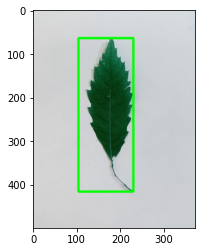

In [31]:
# Attempt on image with background of clear white
req = urllib.request.urlopen(iNatStruct["Image_Link"][8])
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr, -1)
blurred = cv2.blur(img1, (3,3))
canny = cv2.Canny(blurred, 50, 200)

## find the non-zero min-max coords of canny
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

## crop the region
cropped = img1[y1:y2, x1:x2]
#cv2.imwrite("cropped.png", cropped)

tagged = cv2.rectangle(img1.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
plt.imshow(tagged)
#cv2.imshow("tagged", tagged)
#cv2.waitKey()

print(x2-x1)
print(y2-y1)

In [32]:
iNatStruct["Width"] = width
iNatStruct["Height"] = height
iNatStruct["Contour_Area"] = contArea
iNatStruct["Aspect_Ratio"] = ratio
iNatStruct["Extent"] = extentInfo
iNatStruct["Solidity"] = solidityInfo
iNatStruct["Angle"] = angleInfo
iNatStruct.head()

,Image_Label,Image_Link,Species,User,Date,Time,Seconds,Place,Lat,Long,...,B3,RGB3,Prop3,Width,Height,Contour_Area,Aspect_Ratio,Extent,Solidity,Angle
0,p1,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:07:21,43641,"Highview Dr, Blacksburg, VA, US",37.246322,-80.409523,...,61.505021,darkolivegreen,0.039238,254,242,42647.0,1.049587,0.693808,0.919077,105.935860
1,p2,https://inaturalist-open-data.s3.amazonaws.com...,Carolina sweetshrub,llhouse2,2022-05-25,12:09:03,43743,"Virginia, US",37.350497,-80.484791,...,119.256563,gray,0.074636,374,345,60445.0,1.084058,0.468457,0.656854,46.177895
2,p3,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:10:21,43821,"Highview Dr, Blacksburg, VA, US",37.246163,-80.409251,...,110.296020,dimgray,0.018828,295,119,21082.0,2.478992,0.600541,0.898311,89.916687
3,p4,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-05-25,12:10:37,43837,"Highview Dr, Blacksburg, VA, US",37.246379,-80.409562,...,118.490132,gray,0.030628,267,152,19528.5,1.756579,0.481187,0.741387,83.742508
4,p5,https://inaturalist-open-data.s3.amazonaws.com...,None,llhouse2,2022-06-03,10:48:19,38899,Princeton University,40.343137,74.655070,...,33.472685,darkslategray,0.073605,499,458,126945.5,1.089520,0.555458,0.774320,63.340115


### check black-background picture

In [33]:
#black_back = []
#for img in iNatStruct["Image_Link"]: 
#    req = urllib.request.urlopen(img)
#    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#    imgNat_con = cv2.imdecode(arr, -1)
#    imgNat = cv2.imdecode(arr, -1)
#    imgray = cv2.cvtColor(imgNat, cv2.COLOR_BGR2GRAY)
#    blur = cv2.GaussianBlur(imgray, (5,5), 0)
#    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#    cv2.drawContours(imgNat_con, contours, -1, (0, 255, 0), 3)
    #plt.imshow(imgNat_con)
    
#    imgNat = cv2.cvtColor(imgNat,cv2.COLOR_BGR2RGB) #convert bgr to rgb
    
    # grab largest contour
#    largest_contour = max(contours, key=cv2.contourArea)


# create a black `mask` the same size as the original grayscale image 
#    mask = np.zeros_like(imgray)
# fill the new mask with the shape of the largest contour
#    cv2.fillPoly(mask, [largest_contour], 255)
# create a copy of the current mask
#    res_mask = np.copy(mask)
#    res_mask[mask == 0] = cv2.GC_BGD # obvious background pixels
#    res_mask[mask == 255] = cv2.GC_PR_BGD # probable background pixels
#    res_mask[mask == 255] = cv2.GC_FGD # obvious foreground pixels

# create a mask for obvious and probable foreground pixels
#    mask2 = np.where((res_mask == cv2.GC_FGD) | (res_mask == cv2.GC_PR_FGD),255,0).astype('uint8')

# create `new_mask3d` from `mask2` but with 3 dimensions instead of 2
#    new_mask3d = np.repeat(mask2[:, :, np.newaxis], 3, axis=2)
#    mask3d = new_mask3d
#    mask3d[new_mask3d > 0] = 255.0
#    mask3d[mask3d > 255] = 255.0
# apply Gaussian blurring to smoothen out the edges a bit
#    mask3d = cv2.GaussianBlur(mask3d, (5, 5), 0)
    #show('Foreground mask', mask3d)

# create the foreground image by zeroing out the pixels where `mask2` has black pixels
#    foreground = np.copy(imgNat).astype(float)
#    foreground[mask2 == 0] = 0
    #plt.imshow(foreground.astype(np.uint8))
#    black_back.append(foreground.astype(np.uint8))

In [34]:
#plt.imshow(black_back[11])

In [35]:
# attempt on p1
#req = urllib.request.urlopen(iNatStruct["Image_Link"][11])
#arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#imgNat = cv2.imdecode(arr, -1)
#imgray = cv2.cvtColor(imgNat, cv2.COLOR_BGR2GRAY)
#blur = cv2.GaussianBlur(imgray, (5,5), 0)
#thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(imgNat, contours, -1, (0, 255, 0), 3)
#plt.imshow(imgNat)

In [36]:
# Attempt on image with black background 
#blurred = cv2.blur(black_back[11], (3,3))
#canny = cv2.Canny(blurred, 50, 200)

## find the non-zero min-max coords of canny
#pts = np.argwhere(canny>0)
#y1,x1 = pts.min(axis=0)
#y2,x2 = pts.max(axis=0)

## crop the region
#cropped = black_back[11][y1:y2, x1:x2]
#cv2.imwrite("cropped.png", cropped)

#tagged = cv2.rectangle(black_back[11].copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
#plt.imshow(tagged)
#cv2.imshow("tagged", tagged)
#cv2.waitKey()

#print(x2-x1)
#print(y2-y1)

In [37]:
#tag(black_back[11])

In [ ]:
#iNatStruct.to_excel(pd.ExcelWriter, sheet_name='Sheet1', na_rep='', 
#                   float_format=None, columns=None, header=True, index=True, 
#                   index_label=None, startrow=0, startcol=0, engine=None, 
#                   merge_cells=True, encoding=None, inf_rep='inf', verbose=True, 
#                   freeze_panes=None, storage_options=None)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('iNatStruct.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
iNatStruct.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
# convert to csv file
iNatStruct.to_csv('iNatStruct.csv', index=False)